In [1]:
# -*- coding: utf-8 -*-

# 导入一些库, 没有的话需要安装
# 即把下一句注释掉再运行
# !pip install matplotlib tqdm numpy

from networks import SentimentAnalysis
import re
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
import numpy as np


SA = SentimentAnalysis()

# 评分函数
def predict(sent):
    """
    1: positif
    0: neutral
    -1: negatif
    """
    score1, score0 = SA.normalization_score(sent)
    if score1 == score0:
        result = 0
    elif score1 > score0:
        result = 1
    elif score1 < score0:
        result = -1
    return score1 - score0 #result

# 版本为python3，如果为python2需要在字符串前面加上u


# 分句函数
def cut_sent(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return para.split("\n")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/m5/_dlm1fm578j4xyq7t42q21vh0000gp/T/jieba.cache


Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/not.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/positive.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/negative.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/most.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/very.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/more.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/ish.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/insufficiently.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/over.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/inver

Loading model cost 1.151 seconds.
Prefix dict has been built successfully.


In [2]:
def get_sentiment_score(filename):
    """
    获取全文情感分数
    """
    s = []
    # 把此处的文件位置改成要分析的文件位置
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()
        text = cut_sent(text)
        text = list(filter(None, text))
    for w in text:
        s.append(predict(w))
    return s, len(s)


In [3]:
def getarc(filename, outdir='/Users/zinccat/Documents/挑战杯/outputs/2004', nmax=2000, points=200):
    s, length = get_sentiment_score(filename)
    # n = min(length//8, nmax+1)
    n = 15 * length//points
    step = (length - n)//points
    idx = [step*i for i in range(points)]
    l = []
    sc = 0
    for i in range(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))
    l = np.array(l)
    l = l[idx]
    return l

    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    # plt.figure(figsize=(40, 20))
    # plt.plot(l)
    # plt.ylabel("Sentiment Score")
    # plt.title(filename.split('/')[-1][:-4] + "({})".format(n-1))
    # plt.savefig(os.path.join(outdir, filename.split('/')[-1][:-4]) + ".png")
    # plt.close()
    # plt.show()

def savearc(filename, outdir='/Users/zinccat/Documents/挑战杯/outputs/arc', nmax=2000, points=200):
    try:
        s, length = get_sentiment_score(filename)
        # n = min(length//8, nmax+1)
        n = 15 * length//points
        step = (length - n)//points
        idx = [step*i for i in range(points)]
        l = []
        sc = 0
        for i in range(1, len(s)):
            sc += s[i-1]
            if i >= n:
                sc -= s[i-n]
                l.append(sc/(n-1))
        l = np.array(l)
        l = l[idx]
        os.mkdir(os.path.join(outdir, filename.split('/')[-2]), exist_ok=True)
        np.save(os.path.join(outdir, filename.split('/')[-2], filename.split('/')[-1][:-4]), l)
    except Exception as e:
        print(e)
        print(filename)
    

In [11]:
def savearc(filename, outdir='/Users/zinccat/Documents/挑战杯/arc', nmax=2000, points=200):
    try:
        s, length = get_sentiment_score(filename)
        # n = min(length//8, nmax+1)
        n = 15 * length//points
        step = (length - n)//points
        idx = [step*i for i in range(points)]
        l = []
        sc = 0
        for i in range(1, len(s)):
            sc += s[i-1]
            if i >= n:
                sc -= s[i-n]
                l.append(sc/(n-1))
        l = np.array(l)
        l = l[idx]
        os.makedirs(os.path.join(outdir, filename.split('/')[-2]), exist_ok=True)
        np.save(os.path.join(outdir, filename.split('/')[-2], filename.split('/')[-1][:-4]), l)
    except Exception as e:
        print(e)
        print(filename)

In [7]:
import os
from multiprocessing.dummy import Pool as ThreadPool
# pool = ThreadPool(8)
folder = '/Users/zinccat/Documents/挑战杯/晋江2003~2021文包/2011-50本'
# outdir = '/Users/zinccat/Documents/挑战杯/outputs/2006'
outdir = '/Users/zinccat/Documents/挑战杯/arcs'
files = [os.path.join(folder, filename) for filename in os.listdir(folder)]
# pool.map(getarc, files)
# pool.close()
# pool.join()



In [23]:
import os
from multiprocessing.dummy import Pool as ThreadPool

root_path = '/Users/zinccat/Documents/挑战杯/晋江2003~2021文包'
os.chdir(root_path)
for folder in tqdm(os.listdir(root_path)[5:]):
    # outdir = '/Users/zinccat/Documents/挑战杯/outputs/2006'
    pool = ThreadPool(8)
    files = [os.path.join(root_path, folder, filename) for filename in os.listdir(folder)]
    pool.map(savearc, files)
    pool.close()
    pool.join()



 13%|█▎        | 2/15 [12:08<1:17:38, 358.36s/it]

index 0 is out of bounds for axis 0 with size 0
/Users/zinccat/Documents/挑战杯/晋江2003~2021文包/2012-50本/针锋对决825【一个腹黑叔受和兵痞子攻的故事】.txt


100%|██████████| 15/15 [1:48:59<00:00, 435.94s/it]


In [24]:
os.listdir(root_path)

['2017-50本',
 '2016-50本',
 '2014-50本',
 '2015-50本',
 '.DS_Store',
 '2011-50本',
 '2010-50本',
 '2012-50本',
 '2007-50本',
 '2013-50本',
 '2003-30本',
 '2006-30本',
 '2005-30本',
 '2004-30本',
 '2021-50本',
 '2009-50本',
 '2008-50本',
 '2020-50本',
 '2018-50本',
 '2019-50本']

In [10]:
for i in range(2012, 2022):
    folder = '/Users/zinccat/Documents/挑战杯/晋江2003~2021文包/{}-50本'.format(i)
    # outdir = '/Users/zinccat/Documents/挑战杯/outputs/2006'
    outdir = '/Users/zinccat/Documents/挑战杯/arcs'
    files = [os.path.join(folder, filename) for filename in os.listdir(folder)]
    arc_list = []
    for filename in tqdm(files):
        try:
            a = getarc(filename, outdir, nmax=2000, points=200)
            arc_list.append(a)
        except:
            print(filename)
    arc_list = np.array(arc_list)
    np.save('/Users/zinccat/Documents/挑战杯/arcs/{}'.format(i), arc_list)

 42%|████▏     | 21/50 [09:57<13:43, 28.38s/it] 

/Users/zinccat/Documents/挑战杯/晋江2003~2021文包/2012-50本/针锋对决825【一个腹黑叔受和兵痞子攻的故事】.txt


  8%|▊         | 4/50 [00:38<07:02,  9.19s/it]

/Users/zinccat/Documents/挑战杯/晋江2003~2021文包/2017-50本/《一级律师[星际]》作者：木苏里.txt


In [27]:
from glob import glob
PATH = '/Users/zinccat/Documents/挑战杯/arc'
files = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.npy'))]

In [29]:
arcs = []
for file in files:
    arcs.append(np.load(file))

In [31]:
arcs = np.array(arcs)

In [32]:
arcs.shape

(868, 200)

In [60]:
arc_list = []
for filename in files:
    a = getarc(filename, outdir, nmax=2000, points=200)
    arc_list.append(a)

In [ ]:
arc_list = np.array(arc_list)

In [ ]:
np.save('/Users/zinccat/Documents/挑战杯/arcs/2010', arc_list)

In [33]:
from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale

In [34]:
pca = PCA() #n_components=10)
# pca.fit(arc_list)
pca.fit(arcs)

PCA()

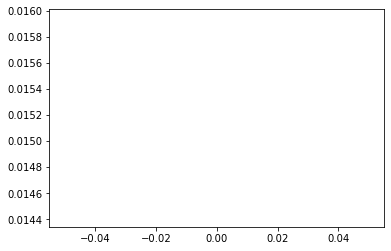

In [35]:
plt.plot(a[1])

In [31]:
arc_list.shape

(30, 200)

In [4]:
a = []
for files in os.listdir('/Users/zinccat/Documents/挑战杯/arcs'):
    a.append(np.load('/Users/zinccat/Documents/挑战杯/arcs/' + files))
a = np.concatenate(a)

In [49]:
a.shape

(210, 200)

Text(0.5, 0, 'components')

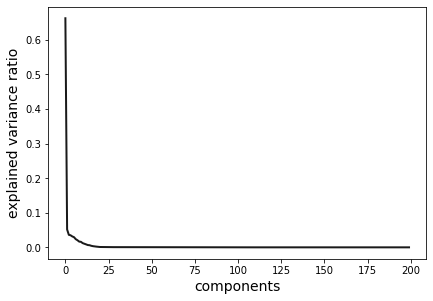

In [36]:
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(pca.explained_variance_ratio_,color=".1",linewidth=2)
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig("PCA-ncomponents-variance.pdf",folder="media/figures/SVD",openfig=False)

In [48]:
pca.explained_variance_ratio_[:3]

array([0.66183279, 0.05166289, 0.03619091])

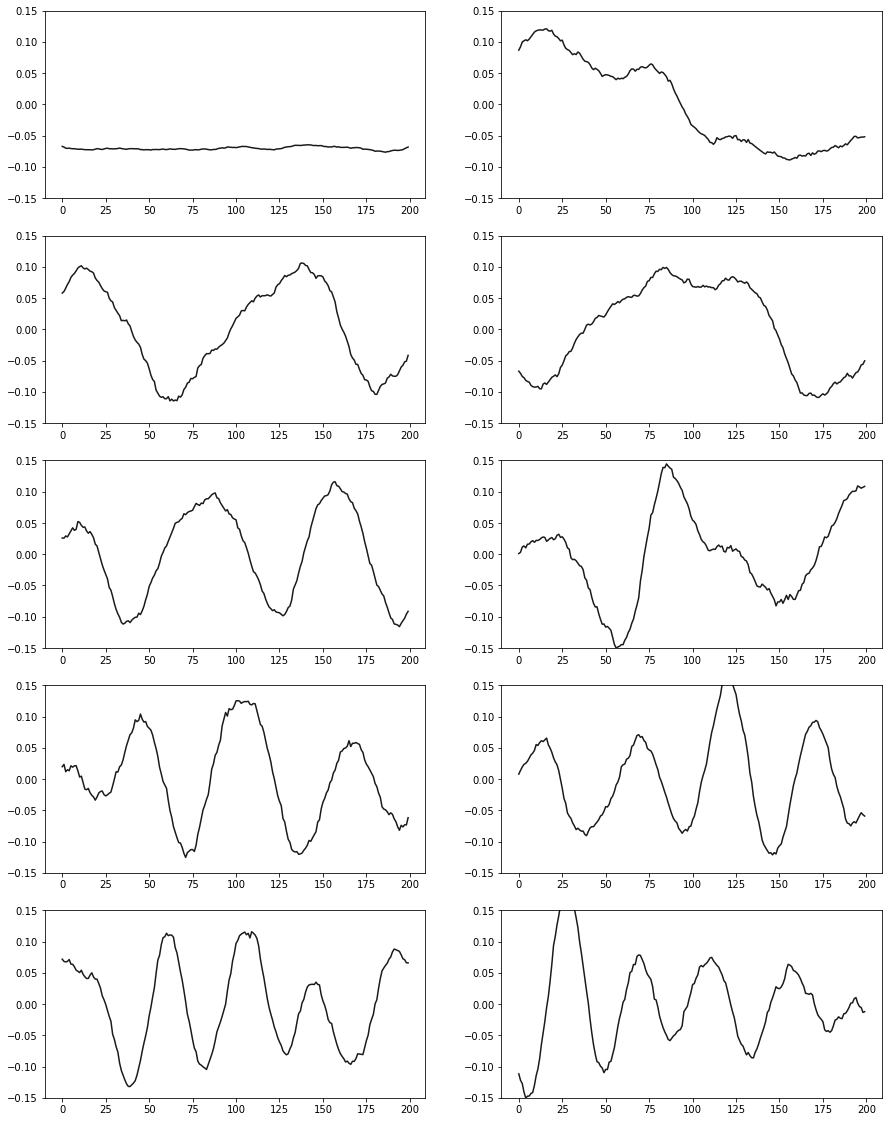

In [37]:
fig = plt.figure(figsize=(15,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])

In [94]:
arcs_normalized = arcs/np.linalg.norm(arcs, axis=1).reshape(-1,1)

/Users/zinccat/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [121]:
arcs_new = np.delete(arcs, not_found, axis=0)

In [119]:
x = np.linalg.norm(arcs_normalized, axis=1)
not_found = []
for i in range(868):
    if isnan(x[i]):
        not_found.append(i)

In [123]:
files_new= files.copy()

In [127]:
files_new[not_found]

TypeError: list indices must be integers or slices, not list

In [130]:
for w in reversed(not_found):
    del(files_new[w])

In [107]:
from math import isnan

In [75]:
np.argmin(np.linalg.norm(arcs_normalized))

0

In [59]:
np.argmax(np.dot(arcs_normalized, pca.components_[1]))

1

In [61]:
np.dot(arcs_normalized, pca.components_[1]).shape

(868,)

In [63]:
files[1]

'/Users/zinccat/Documents/挑战杯/arc/2017-50本/《空降热搜》作者：颜凉雨.npy'

In [50]:
for i in range(20):
    np.save("pca[{}]".format(i), pca.components_[i])

In [191]:
arcs_normalized = arcs_new/np.linalg.norm(arcs_new, axis=1).reshape(-1,1)
temp = np.argsort(np.dot(arcs_normalized, pca.components_[0]))[:20]

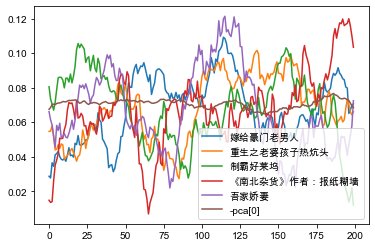

In [192]:
plt.rcParams["font.sans-serif"]=["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"]=False
for i in temp[:5]:
    plt.plot(arcs_normalized[i])
plt.plot(-pca.components_[0])
leg = ['{}'.format(files_new[i].split('/')[-1][:-4]) for i in temp[:5]]
leg.append('-pca[0]')
plt.legend(leg)
plt.savefig('/Users/zinccat/Documents/挑战杯/pca_figure/-pca0.png', dpi=300)

In [163]:
['{}'.format(files_new[i].split('/')[-1][:-4]) for i in temp[:5]]

['后宫升级记(水心)', '如珠似玉', '爱殇', '[现言]第二十八年春', '八宝妆[金榜]']

In [161]:
files_new[1].split('/')[-1]

'[穿越.年代]六零年代好生活.npy'

In [146]:
files[309]

'/Users/zinccat/Documents/挑战杯/arc/2012-50本/龙图案卷集（1-20卷全本完结+16番外）.npy'

100%|██████████| 3464/3464 [00:00<00:00, 254703.80it/s]


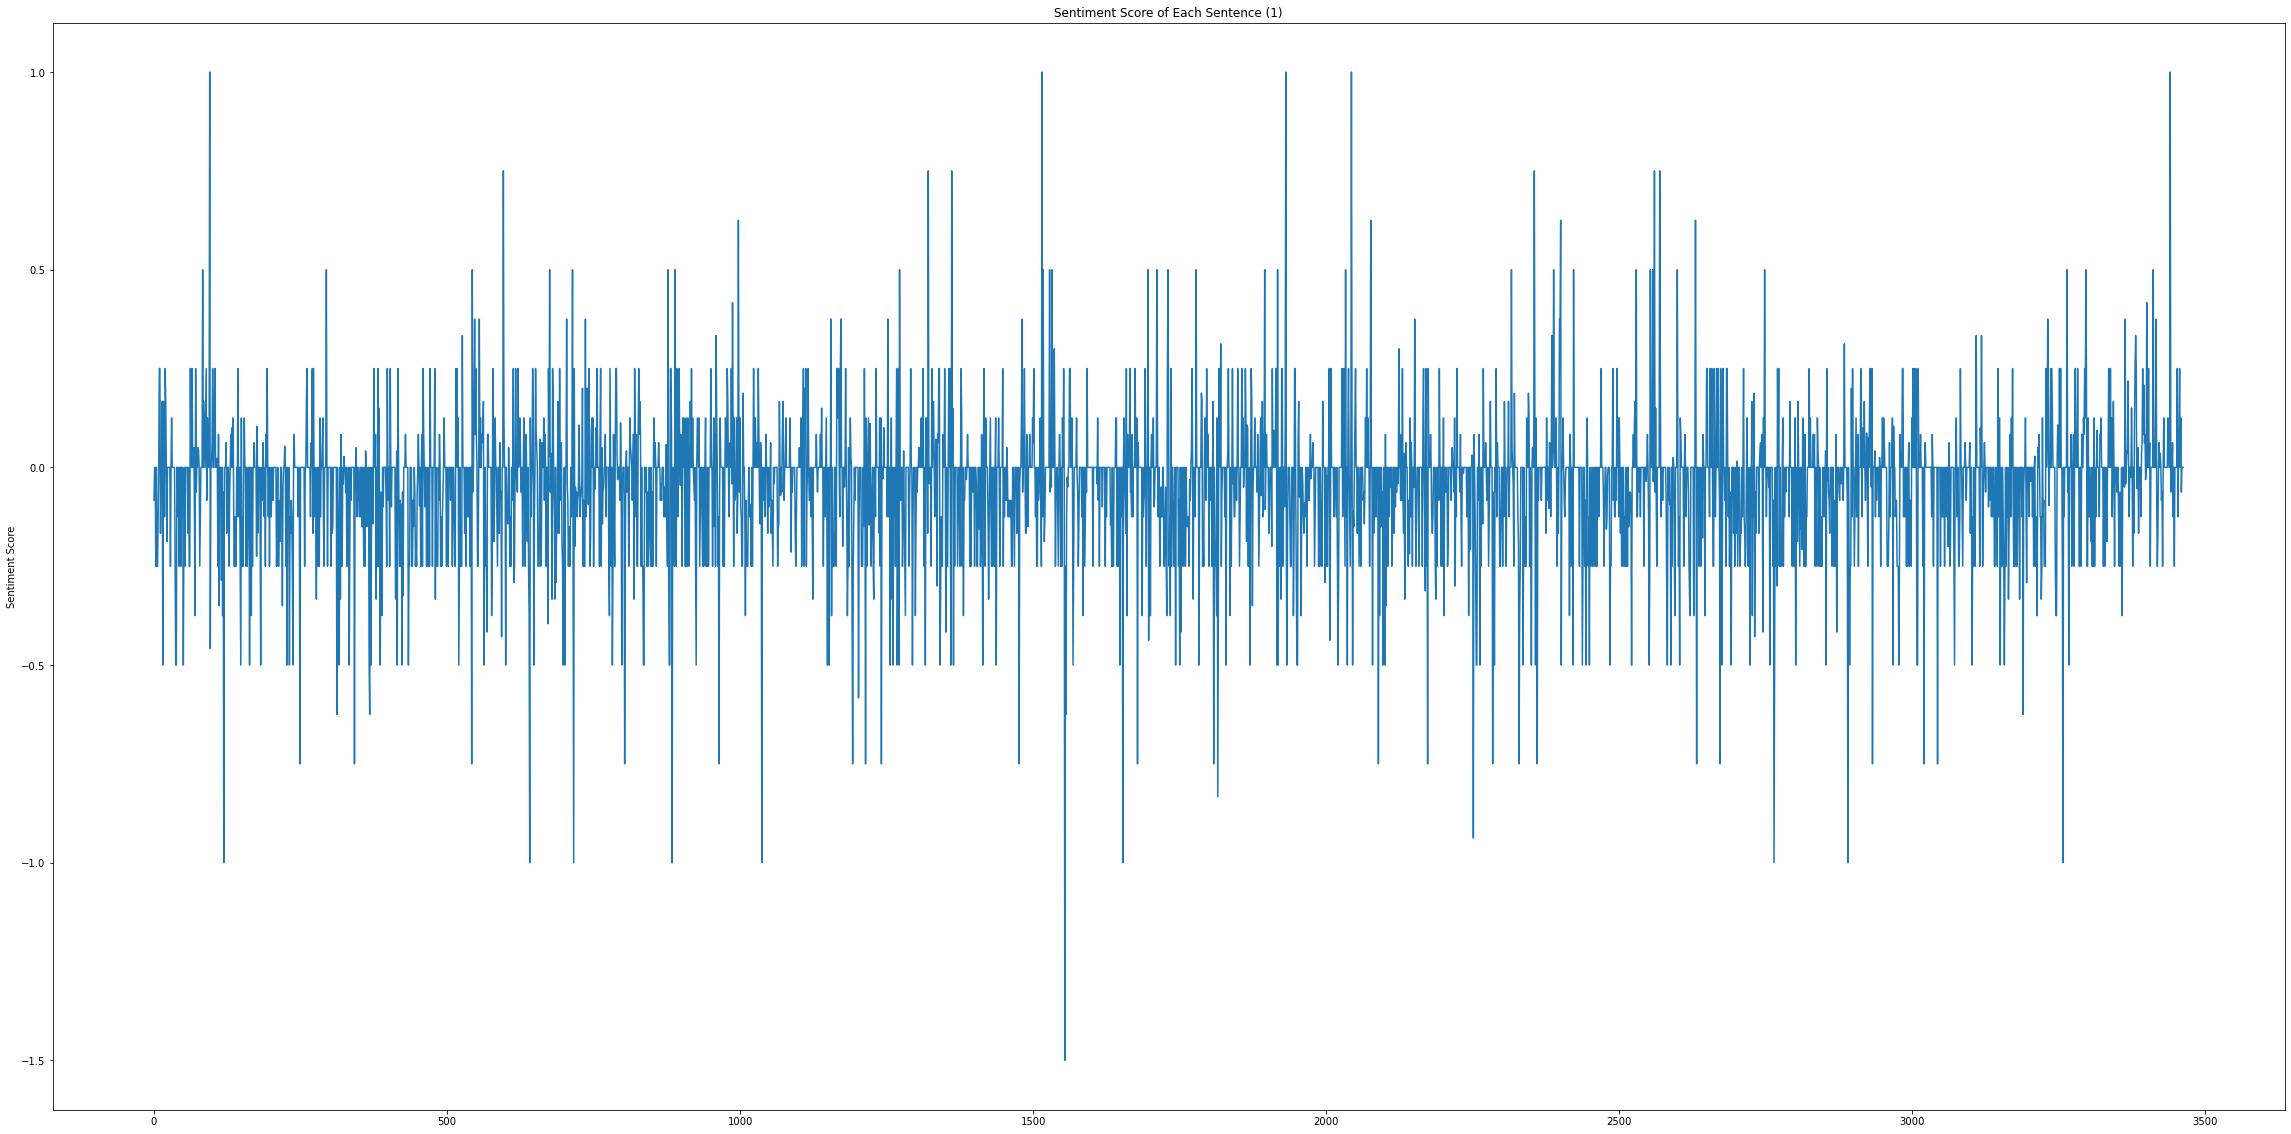

100%|██████████| 3464/3464 [00:00<00:00, 424367.47it/s]


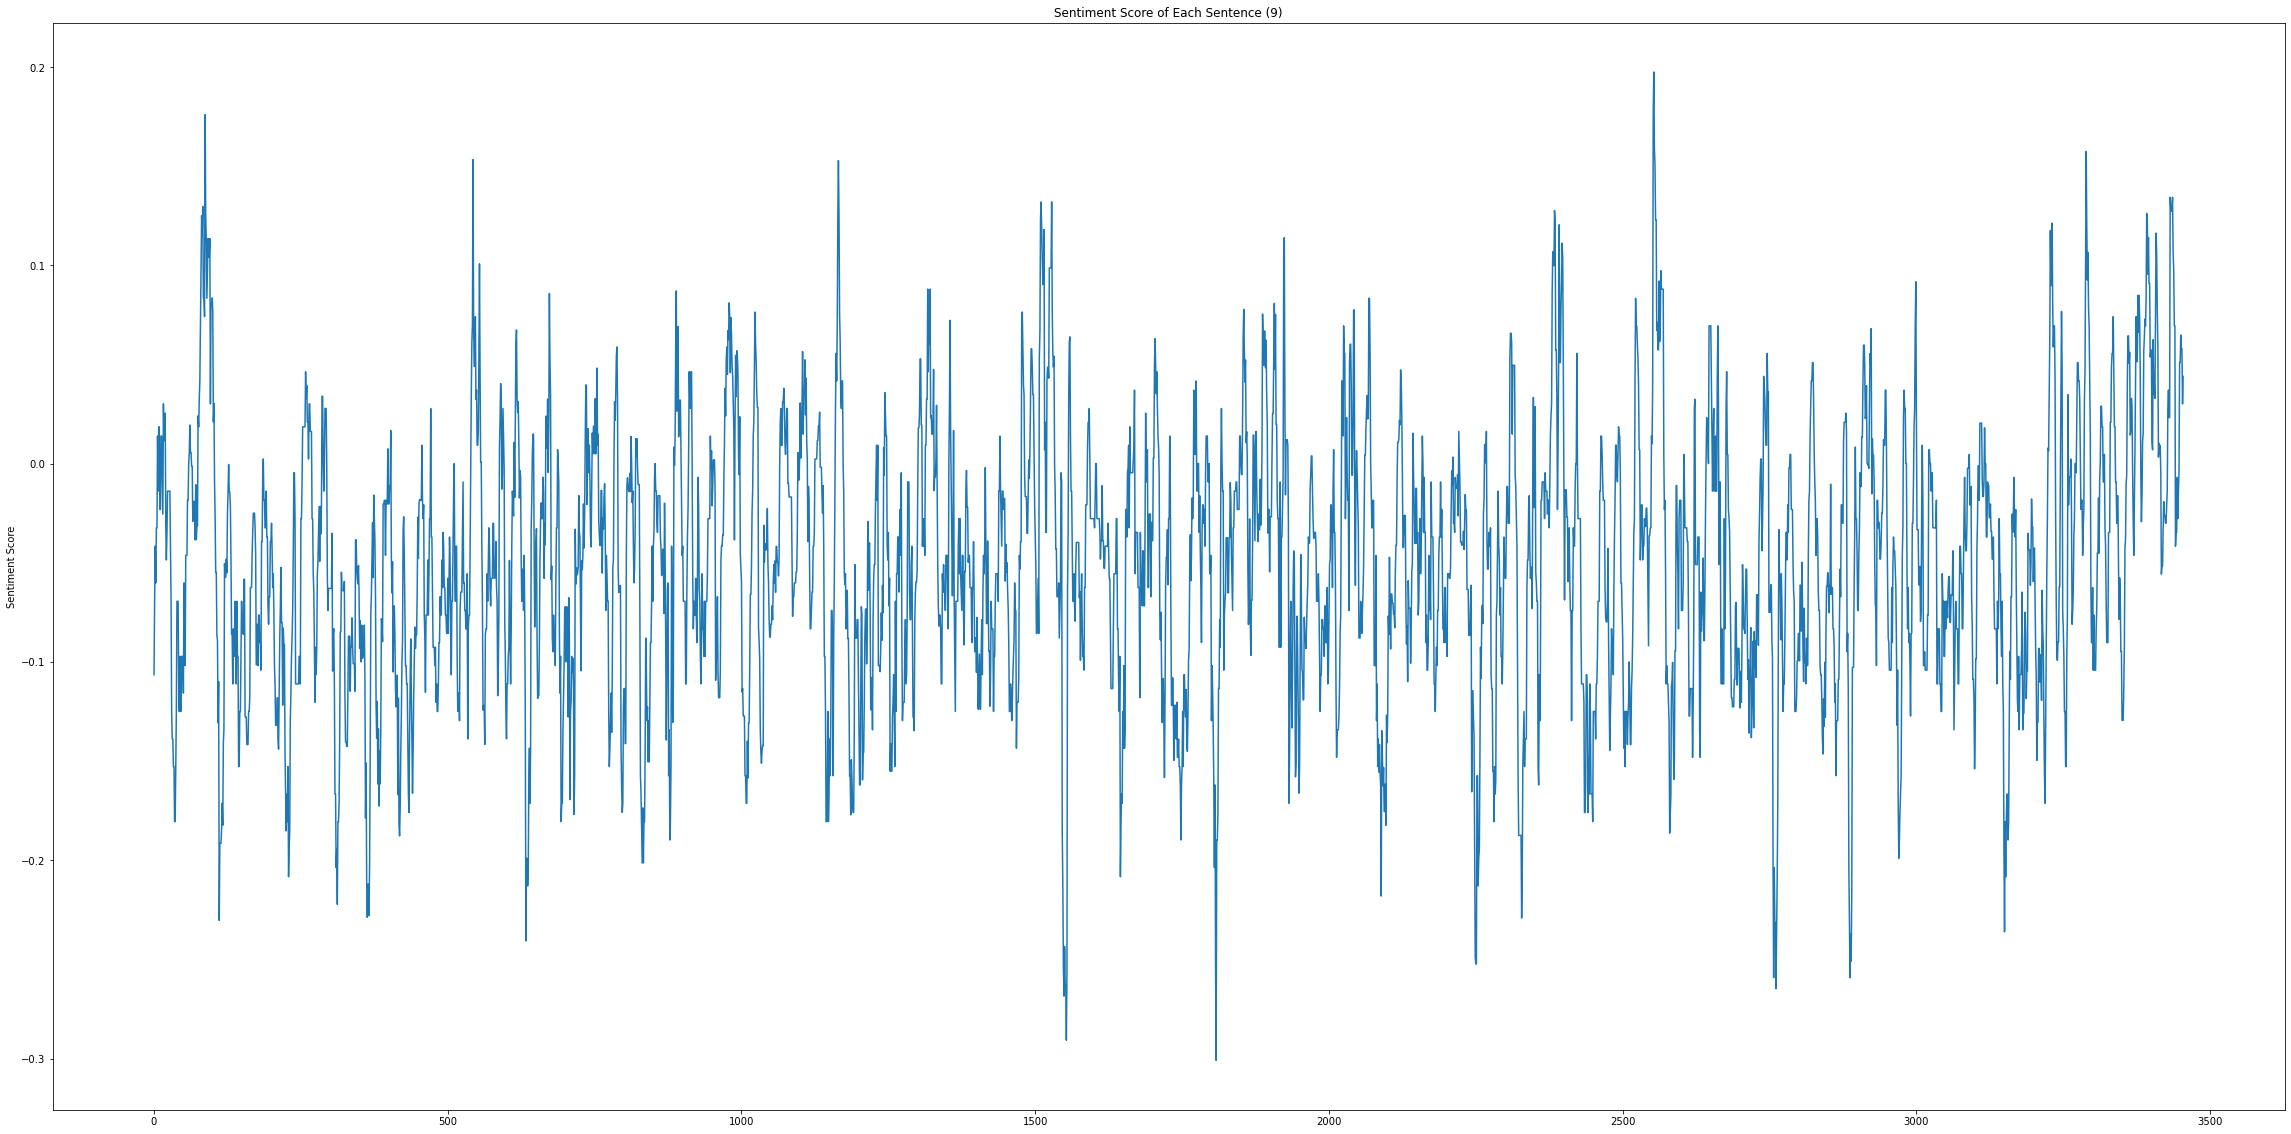

100%|██████████| 3464/3464 [00:00<00:00, 173930.01it/s]


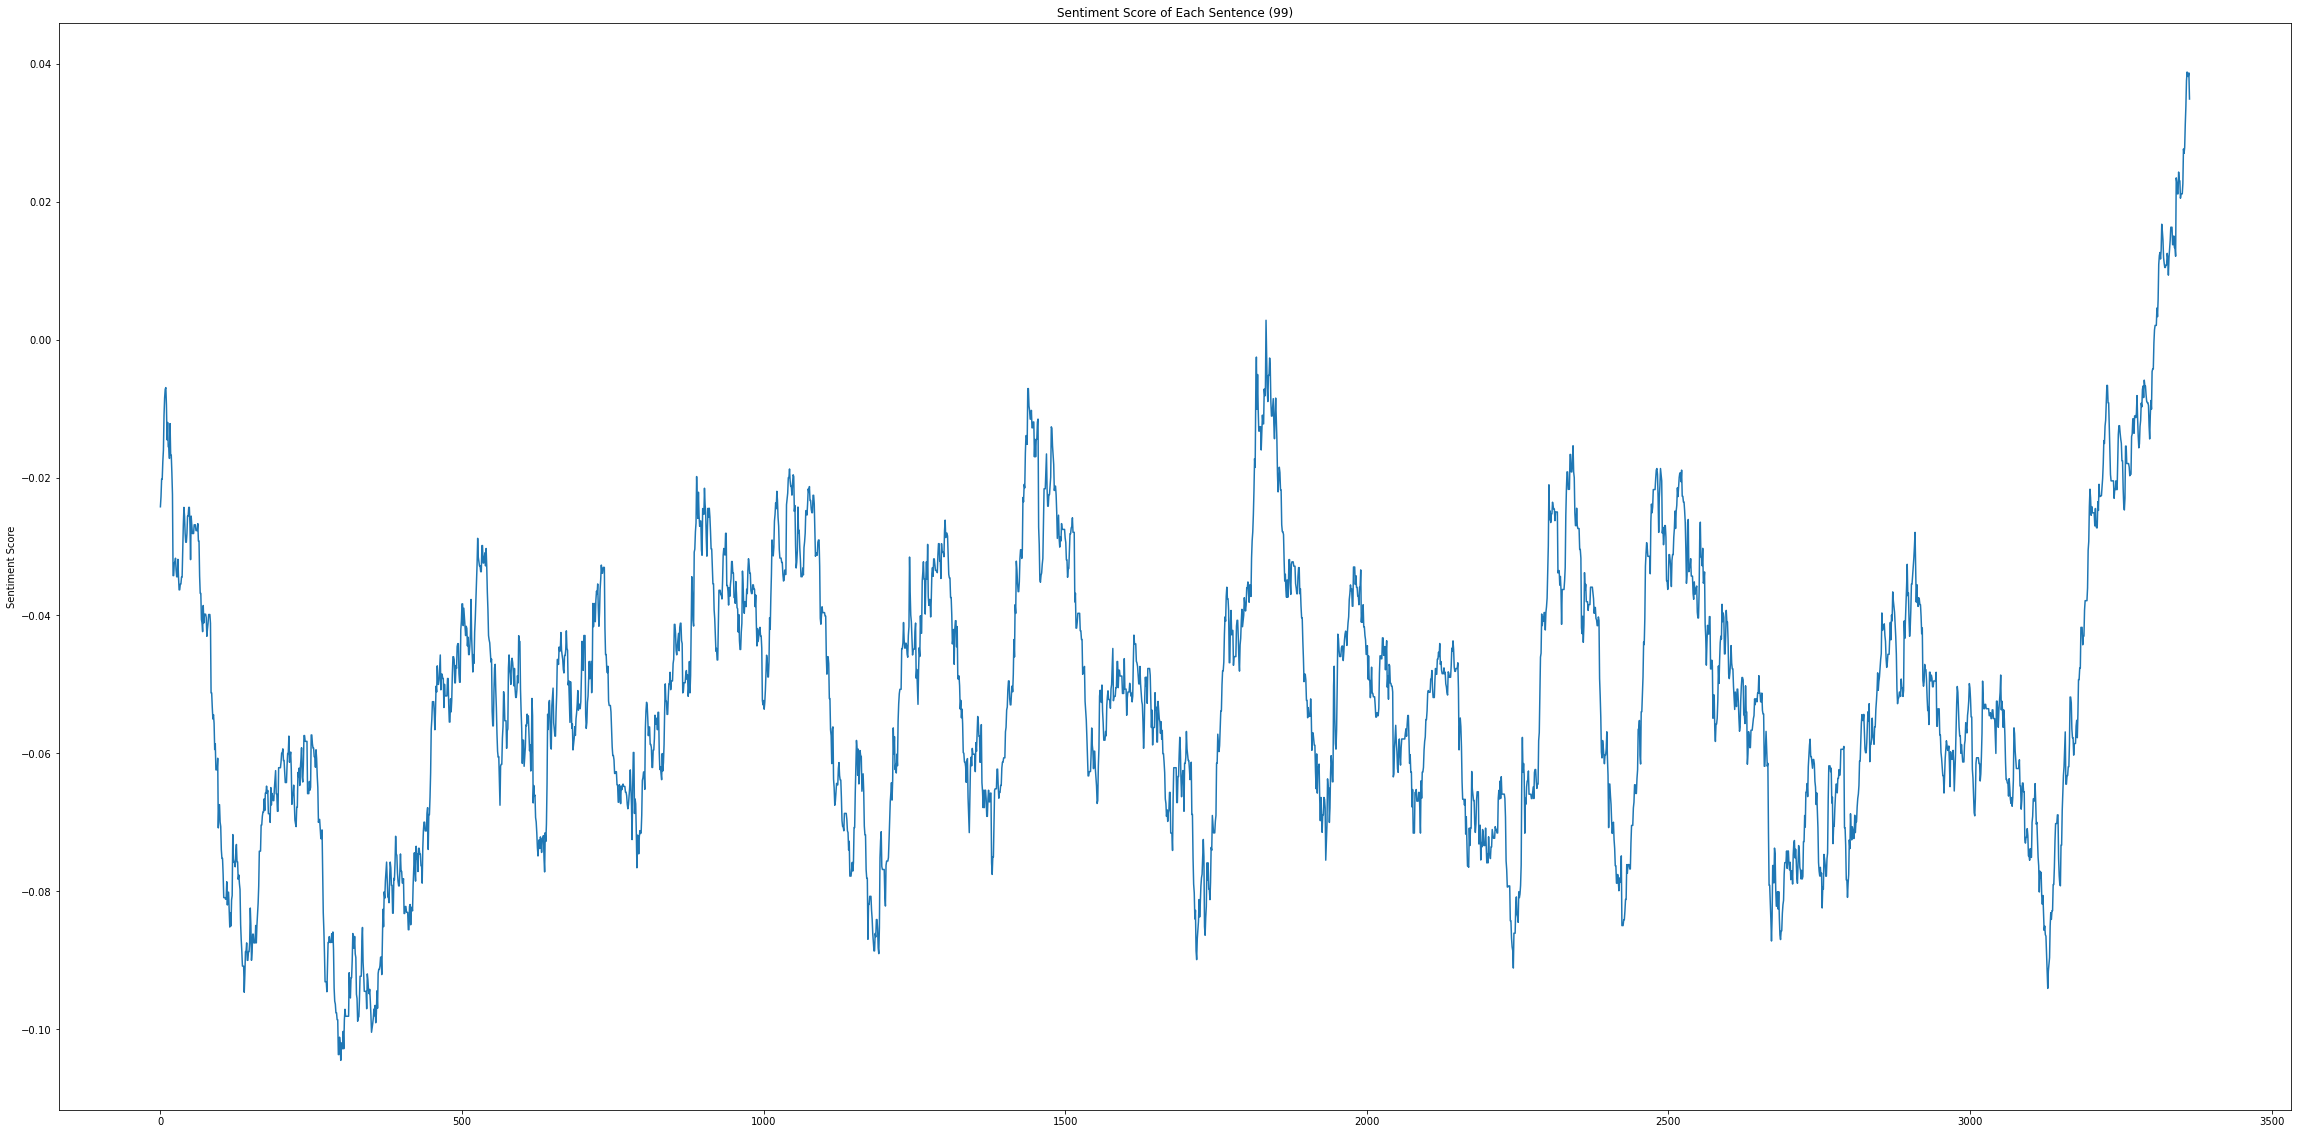

100%|██████████| 3464/3464 [00:00<00:00, 500226.17it/s]


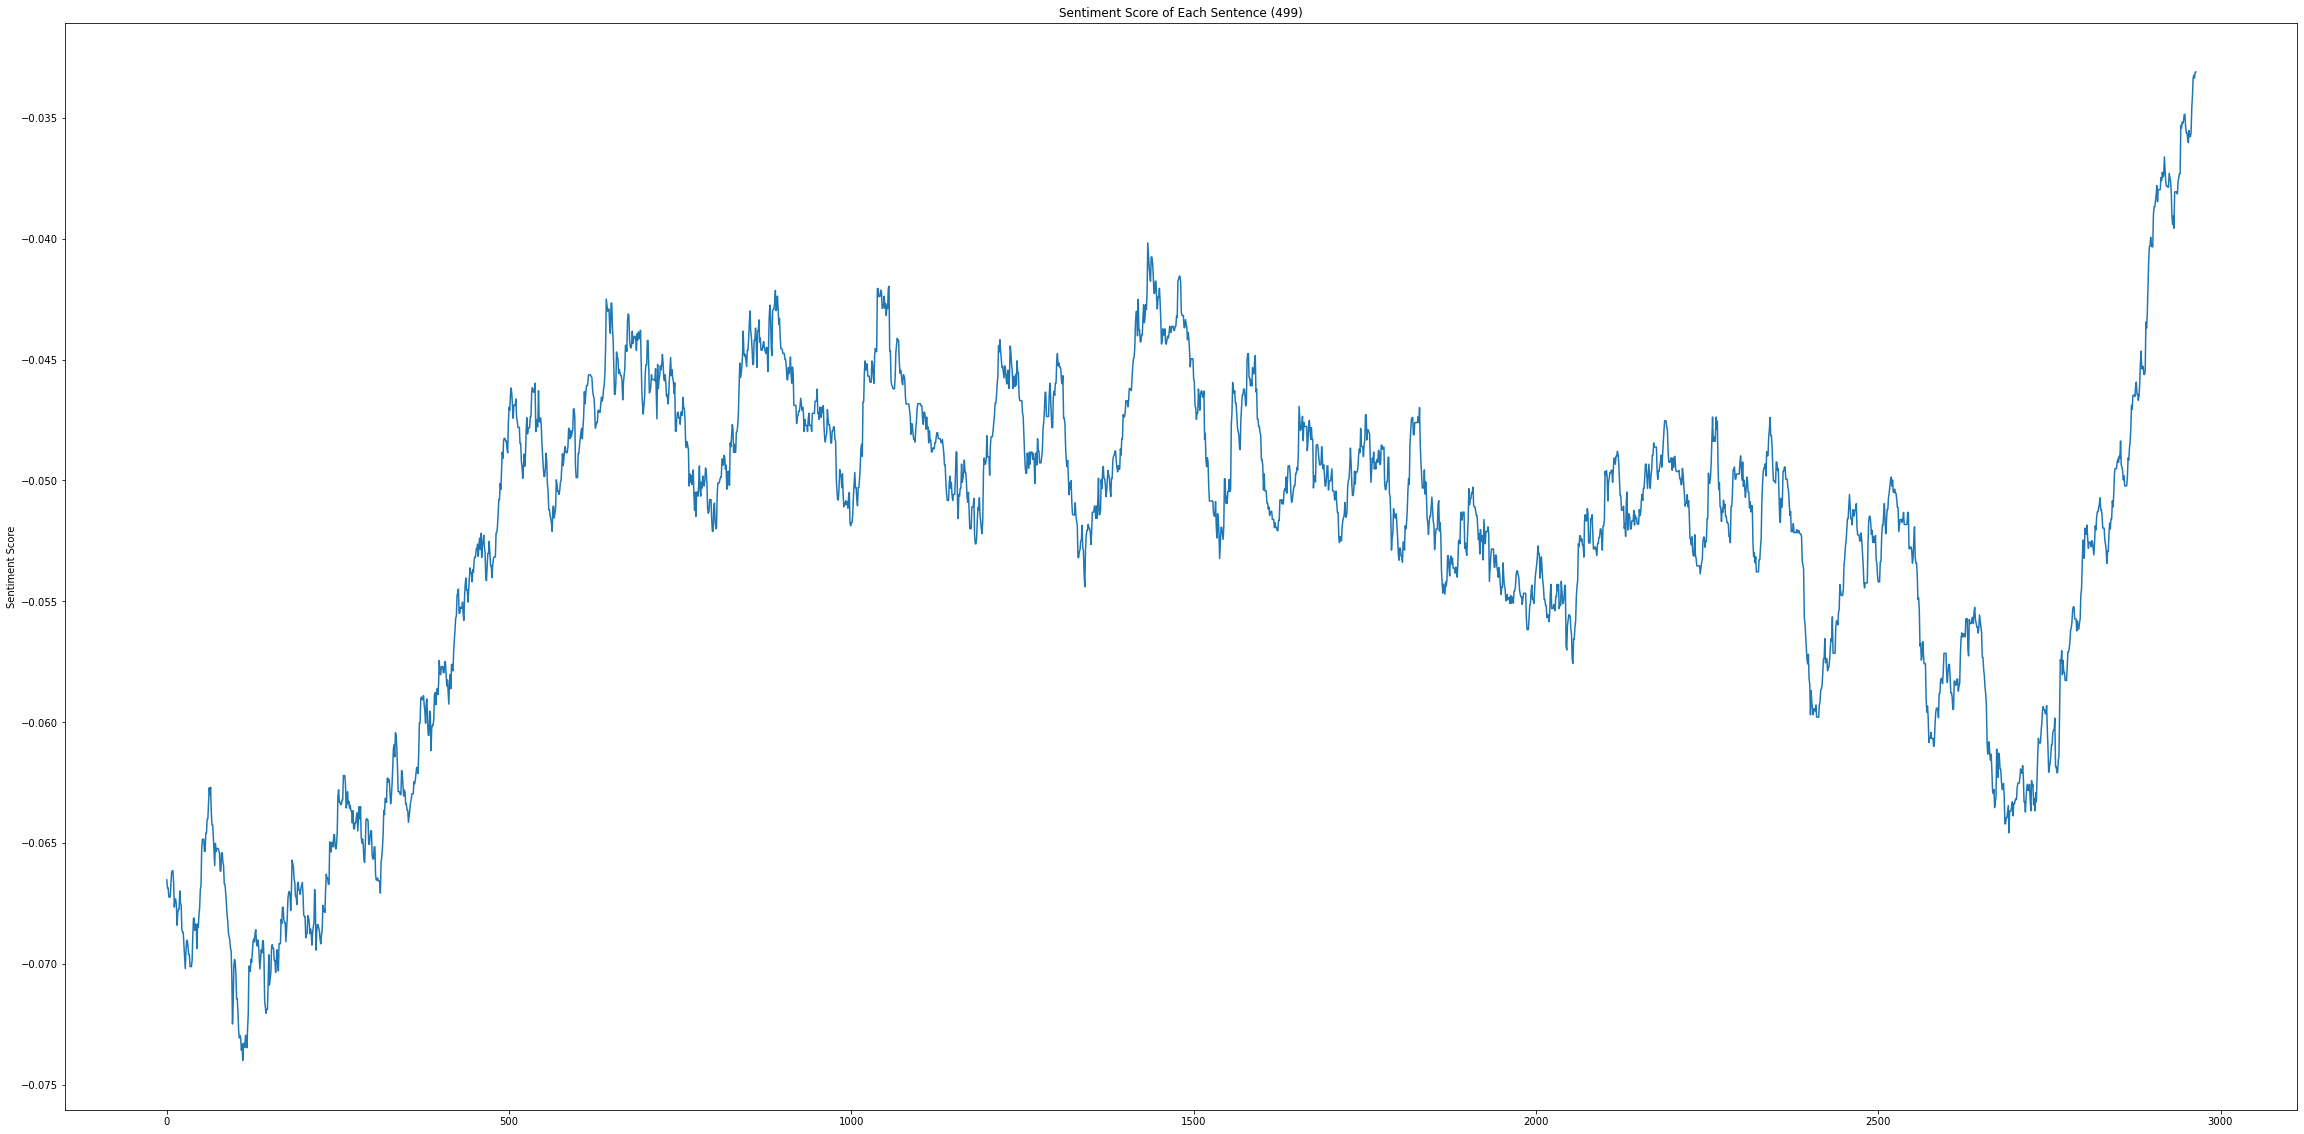

100%|██████████| 3464/3464 [00:00<00:00, 434247.98it/s]


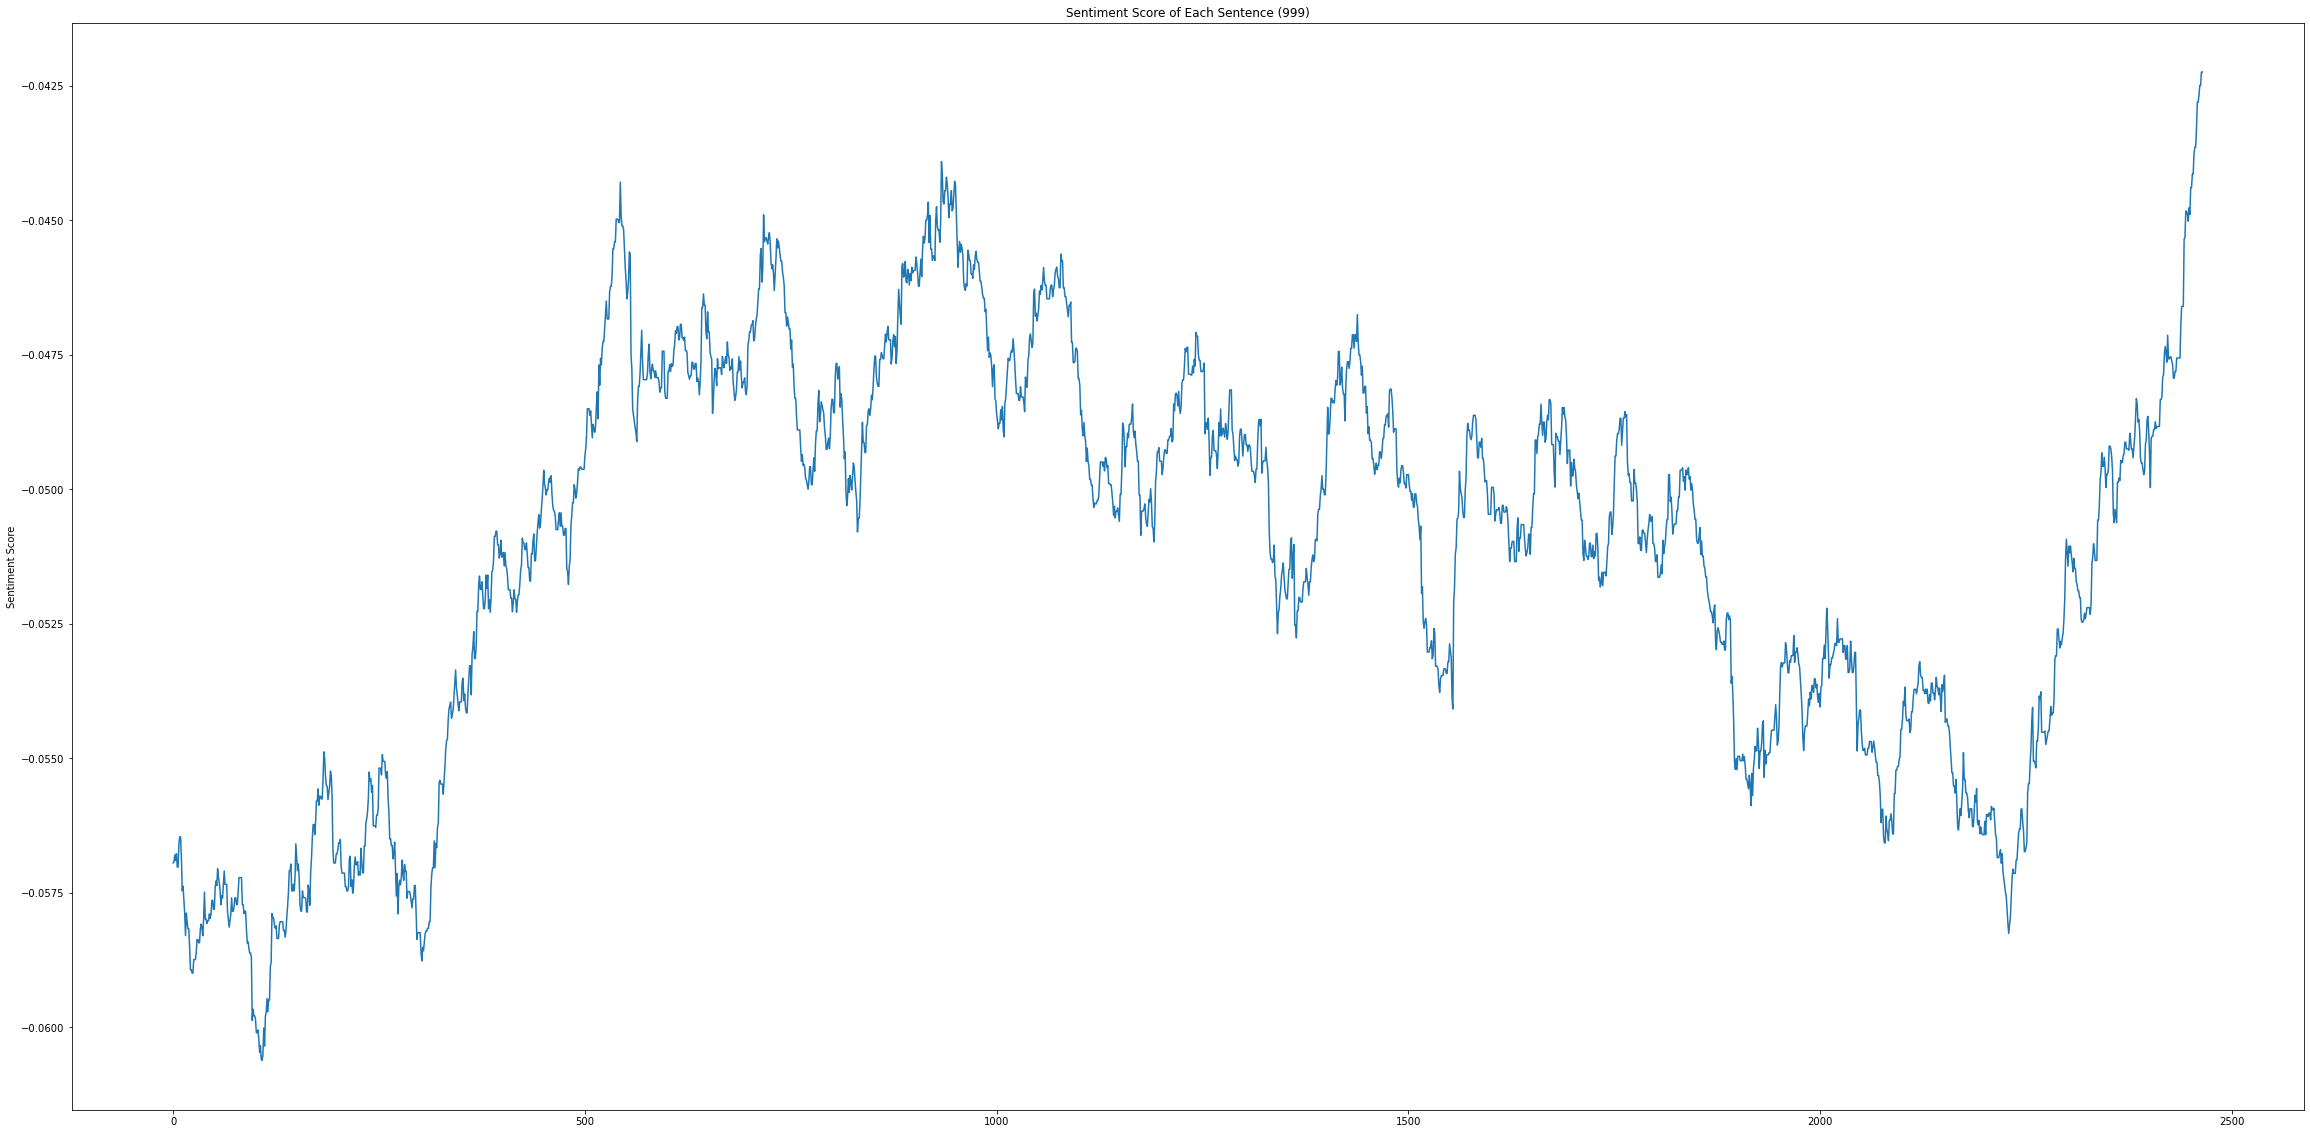

100%|██████████| 3464/3464 [00:00<00:00, 539392.23it/s]


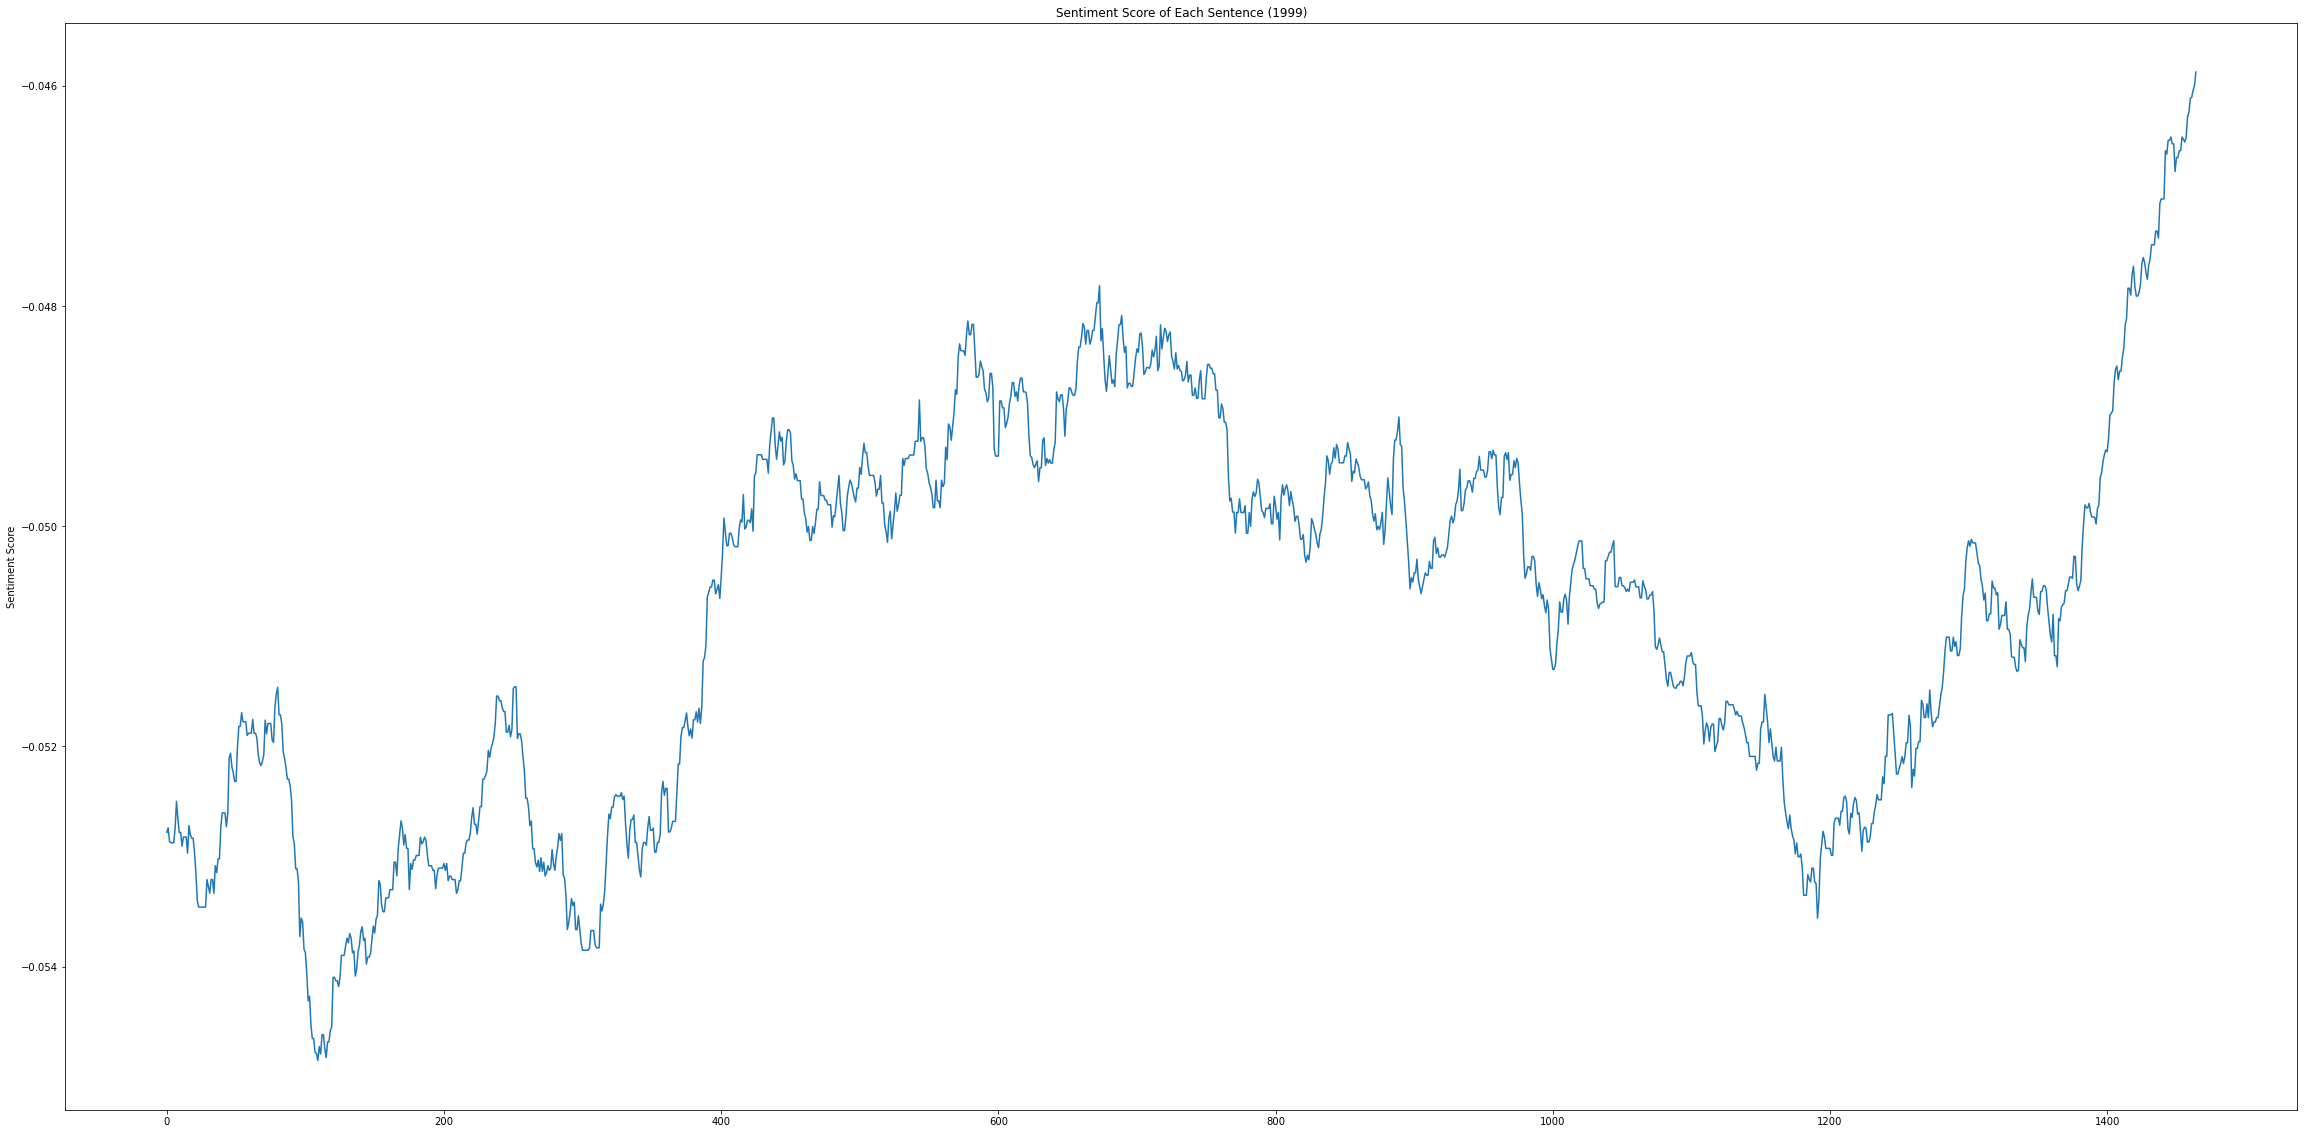

In [ ]:
# 绘制弧线
n_list = [2, 10, 100, 500, 1000, 2000]
for n in n_list:
    l = []
    sc = 0
    for i in trange(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))
    plt.figure(figsize=(40, 20))
    plt.plot(l)
    plt.ylabel("Sentiment Score")
    plt.title("Sentiment Score of Each Sentence ({})".format(n-1))
    plt.show()
    # 用于保存情感弧
    # plt.save("Sentiment Score of Each Sentence ({}).png".format(n-1))

In [ ]:
predict("这就对了！好，全体一致通过！接下来，咱们就开始制订规划，讨论具体的行动步骤吧！")

0.08333333333333333

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

s = np.load('/Users/zinccat/Documents/挑战杯/arcs_final/2007-50本/《灯火阑珊》猴面包树.npz')["arr_0"]

In [30]:
slen = len(s)
window_length = slen//15*2+1
s=savgol_filter(s,  window_length, 2)
# s=savgol_filter(s,  window_length, 2)

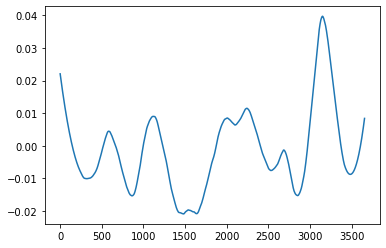

In [32]:
plt.plot(s)

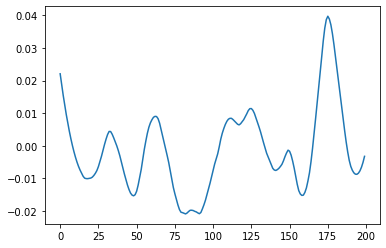

In [34]:
plt.plot(s[idx])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

def sample(s, slen, points=200):
    window_length = slen//15*2+1
    s=savgol_filter(s,  window_length, 2)
    s=savgol_filter(s,  window_length, 2)
    points = 200
    step = slen//points
    idx = [step*i for i in range(points)]
    return s[idx]

s = np.load('/Users/zinccat/Documents/挑战杯/arcs_final/2007-50本/《灯火阑珊》猴面包树.npz')["arr_0"]
slen = len(s)
out = sample(s, slen)

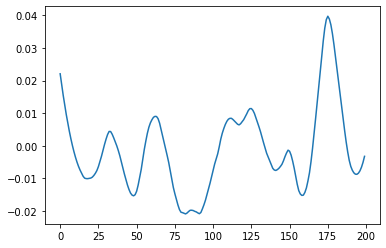

In [36]:
plt.plot(out)